<a href="https://colab.research.google.com/github/rennyatwork/CegepSteFoy_IA/blob/main/08_deep_learning/examen_final_q_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import Adam
import tensorflow_datasets as tfds


In [5]:

# Charger les données cats_vs_dogs
(X_train, y_train), (X_test, y_test), (X_valid, y_valid) = tfds.load(name='cats_vs_dogs', split=['train[:15%]', 'train[15%:20%]','train[20%:25%]'], batch_size=-1, as_supervised=True)

# Prétraitement des données (redimensionnement des images)
X_train = tf.image.resize(X_train, (224, 224))
X_valid = tf.image.resize(X_valid, (224, 224))
X_test = tf.image.resize(X_test, (224, 224))

# Chargement du modèle pré-entraîné MobileNetV2 (sans les couches de classification)
base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

# Congeler les couches du modèle pré-entraîné (sauf les dernières)
for layer in base_model.layers[:-1]:
    layer.trainable = False

# Ajout de nouvelles couches pour la classification binaire (chat ou chien)
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')  # Couche de sortie binaire
])

# Compiler le modèle
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Entraîner le modèle (quelques époques pour démonstration)
history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=2, batch_size=32)

# Faire des prédictions sur quelques exemples de test
predictions = model.predict(X_test[:10])


Epoch 1/2
110/110 [==============================] - 160s 1s/step - loss: 0.7678 - accuracy: 0.5383 - val_loss: 0.6376 - val_accuracy: 0.6280
Epoch 2/2
1/1 [==============================] - 1s 1s/step


1/1 [==============================] - 1s 572ms/step


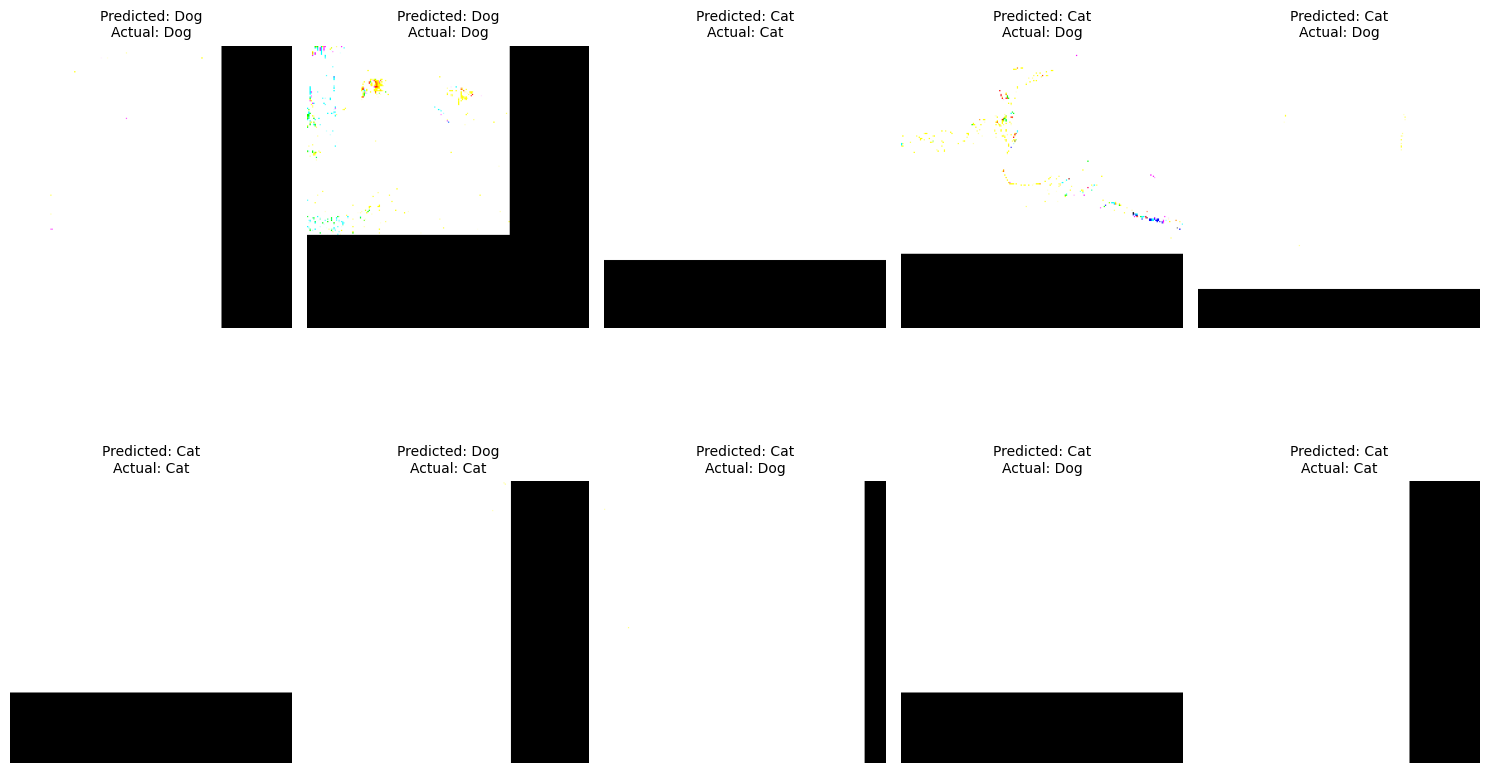

In [11]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Make predictions on a subset of the test data
subset_size = 10  # Number of images to show
subset_indices = np.random.choice(len(X_test), subset_size, replace=False)
subset_indices = tf.constant(subset_indices)  # Convert to TensorFlow tensor
subset_images = tf.gather(X_test, subset_indices)
subset_labels = tf.gather(y_test, subset_indices)

# Make predictions on the subset
predictions = model.predict(subset_images)
predicted_labels = (predictions > 0.5).astype(int)  # Threshold at 0.5 for binary classification

# Define class names for cats and dogs
class_names = ["Cat", "Dog"]

# Display the images along with predictions and real labels
plt.figure(figsize=(15, 10))
for i in range(subset_size):
    plt.subplot(2, 5, i + 1)
    plt.imshow(subset_images[i])
    plt.title(f'Predicted: {class_names[predicted_labels[i][0]]}\nActual: {class_names[int(subset_labels[i])]}', fontsize=10)
    plt.axis('off')

plt.tight_layout()
plt.show()
